In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')

import sandbox.sandbox as sb
import matplotlib.pyplot as plt

Freenect module not found, KinectV1 will not work.


./../../../open_AR_Sandbox\sandbox\sandbox.py:2646: UserWarning: gempy not found, GeoMap Module will not work
  warn('gempy not found, GeoMap Module will not work')


### Start empty 

In [14]:
#calib = sb.CalibrationData(p_width=1280, p_height=800)
calib = sb.CalibrationData(file = 'daniel_calibration.json')

JSON configuration loaded.


In [15]:
sensor = sb.DummySensor(calib, depth_limits=(500,2000))

DummySensor initialized.


In [16]:
sensor = sb.KinectV2(calib)

KinectV2 initialized.


### Find aruco corners 

In [5]:
marker = sb.ArucoMarkers(sensor)

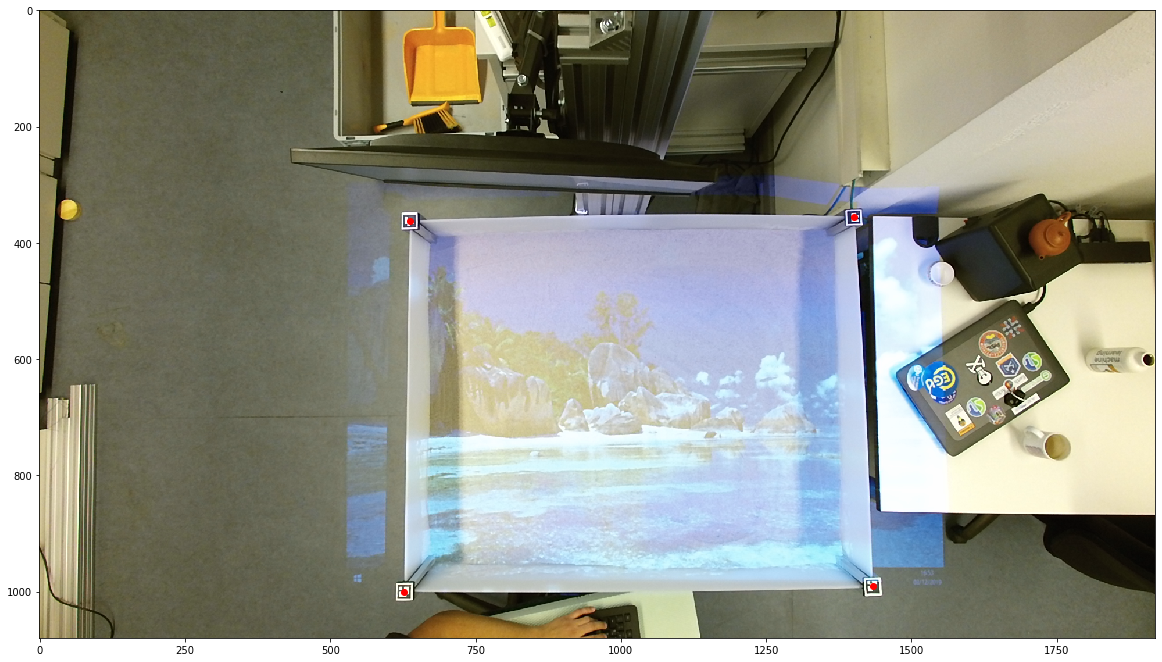

In [6]:
marker.find_markers_rgb(amount = 4)
marker.plot_aruco_location('RGB')

In [7]:
calib.corners_as_json(marker.rgb_markers)

### Open projector image

In [17]:
projector = sb.Projector(calib)

Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [18]:
module = sb.CalibModule(calib, sensor, projector)

In [19]:
auto = sb.AutomaticModule(calib, sensor, projector)

### Calibrate Projector

In [20]:
module.calibrate_projector()

Column
    [0] Markdown(str)
    [1] WidgetBox(css_classes=['widget-box'])
        [0] IntSlider(end=780, name='Main frame top margin', value=220)
        [1] IntSlider(end=1260, name='Main frame left margin', value=714)
        [2] IntSlider(end=1280, name='Main frame width', start=10, value=203)
        [3] IntSlider(end=800, name='Main frame height', start=10, value=475)
        [4] Checkbox(name='Enable Automatic C...)
        [5] Button(button_type='success', name='Run')

In [26]:
import numpy 
df_p, corner = auto.marker.find_markers_projector(amount=2)
df_r = auto.rgb_corners

x_p = int(df_p.loc[df_p.ids == auto.corner_id_LU].Corners_projector_x.values)
y_p = int(df_p.loc[df_p.ids == auto.corner_id_LU].Corners_projector_y.values)

x_r = int(df_r.loc[df_r.ids == auto.corner_id_LU].Corners_RGB_x.values)
y_r = int(df_r.loc[df_r.ids == auto.corner_id_LU].Corners_RGB_y.values)

cor = numpy.asarray(corner)
scale_factor_x = 100 / (cor[:,0].max() - cor[:,0].min())
scale_factor_y = 100 / (cor[:,1].max() - cor[:,1].min())

x_move = int(((x_p - x_r) * scale_factor_x)) - 100 - 10
y_move = int(((y_p - y_r) * scale_factor_y)) - 100 - 10

p_frame_left = auto.calib.p_frame_left - x_move
p_frame_top = auto.calib.p_frame_top - y_move

x_c = df_r.Corners_RGB_x.mean()
y_c = df_r.Corners_RGB_y.mean()

x_pc = int(df_p.loc[df_p.ids == auto.center_id].Corners_projector_x.values)
y_pc = int(df_p.loc[df_p.ids == auto.center_id].Corners_projector_y.values)

width_move = int((x_c - x_pc) * scale_factor_x) + x_move - 10
height_move = int((y_c - y_pc) * scale_factor_y) + y_move - 10

p_frame_width = auto.calib.p_frame_width + width_move
p_frame_height = auto.calib.p_frame_height + height_move
        
print(p_frame_left, p_frame_top, p_frame_width, p_frame_height)

98 88 927 324


### Calibrate Sensor

In [ ]:
module.setup()

In [ ]:
module.run()

In [ ]:
module.calibrate_sensor()

In [ ]:
module.stop()

### Save file

In [12]:
calib.save_json('daniel_calibration.json')

JSON configuration file saved: daniel_calibration.json


In [ ]:
my_calib = sb.CalibrationData(file='daniel_calibration.json')

### Fast way

In [ ]:
module.calibrate()

In [ ]:
#calib = sb.CalibrationData(file = 'daniel_calibration.json')
calib = sb.CalibrationData(file = 'daniel_projector_calibration.json')
kinect = sb.KinectV2(calib)

#sensor = sb.DummySensor(calib, depth_limits=(500,2000))
sensor = sb.KinectV2(calib)
projector = sb.Projector(calib)
module = sb.CalibModule(calib, sensor, projector)
marker = sb.ArucoMarkers(sensor)
auto = sb.AutomaticModule(calib, sensor, projector)


In [ ]:
module.setup()

In [ ]:
module.run()

In [ ]:
module.calibrate()

In [ ]:
marker.plot_aruco_location('RGB')

In [ ]:
id2 = marker.convert_color_to_depth('Real', 2, auto.CoordinateMap)
id15 = marker.convert_color_to_depth('Real', 15, auto.CoordinateMap)
id5 = marker.convert_color_to_depth('Real', 5, auto.CoordinateMap)
id1 = marker.convert_color_to_depth('Real', 1, auto.CoordinateMap)


In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(sensor.get_ir_frame())
plt.plot(auto.marker.CoordinateMap.Depth_x, auto.marker.CoordinateMap.Depth_y, 'r.', lw =0, alpha = 0.2)
plt.plot(id2.Depth_x,id2.Depth_y, 'ro')
plt.plot(id15.Depth_x,id15.Depth_y, 'ro')
plt.plot(id5.Depth_x,id5.Depth_y, 'ro')
plt.plot(id1.Depth_x,id1.Depth_y, 'ro')

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(sensor.get_color())
plt.plot(auto.marker.CoordinateMap.Color_x, auto.marker.CoordinateMap.Color_y, 'r.', lw =0, alpha = 0.2)
plt.plot(id2.Color_x,id2.Color_y, 'bo')
plt.plot(id15.Depth_x,id15.Depth_y, 'bo')
plt.plot(id5.Depth_x,id5.Depth_y, 'bo')
plt.plot(id1.Depth_x,id1.Depth_y, 'bo')

In [ ]:
marker.find_markers_ir(amount = 4)

In [ ]:
marker.plot_aruco_location('IR')

In [ ]:
marker.find_markers_rgb(amount=1)

In [ ]:
marker.create_CoordinateMap()

In [ ]:
mapper = marker.CoordinateMap

In [ ]:
after_mapped = marker.convert_color_to_depth('Real',1,mapper)
after_mapped

In [ ]:
marker.plot_aruco_location('RGB')

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(sensor.get_ir_frame())
plt.plot(after_mapped.Depth_x, after_mapped.Depth_y, 'ro')

In [ ]:
plt.figure(figsize = (20,20))
z_point = sensor.get_frame()
plt.imshow(sensor.get_ir_frame())
x = 405
y = 380
plt.plot(x, y, 'ro')
z_point[y][y]

In [ ]:
marker.rgb_markers

In [ ]:
point = pykinect2.PyKinectV2._DepthSpacePoint(x, y)
col = sensor.device._mapper.MapDepthPointToColorSpace(point, z_point[y][x])
#cam = sensor.device._mapper.MapDepthPointToCameraSpace(point, z_point)

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(sensor.get_color())
plt.plot(col.x+8,col.y-65, 'ro')

In [ ]:
col.y

In [ ]:
module.setup()

In [ ]:
module.run()

In [ ]:
module.stop()

In [ ]:
marker.rgb_markers = auto.rgb_corners

In [ ]:
auto.crop_image_aruco()

In [ ]:
x = marker.convert_color_to_depth('Real', 2)

In [ ]:
type(x.Depth_y)

In [ ]:
module._callback_automatic_calibration(1)

In [ ]:
df_p, corner = marker.find_markers_projector(amount=2)

In [ ]:
df_r = auto.rgb_corners

In [ ]:
x_c = df_r.Corners_RGB_x.mean()
y_c = df_r.Corners_RGB_y.mean()
print(x_c, y_c)

In [ ]:
x_pc = int(df_p.loc[df_p.ids == 20].Corners_projector_x.values)
y_pc = int(df_p.loc[df_p.ids == 20].Corners_projector_y.values)
print(x_pc, y_pc)

In [ ]:
cor = numpy.asarray(corner)
scale_factor_x = 100 / (cor[:, 0].max() - cor[:, 0].min())
scale_factor_y = 100 / (cor[:, 1].max() - cor[:, 1].min())
print(scale_factor_x,scale_factor_y)

In [ ]:
width_move = int((x_c - x_pc) * scale_factor_x)
height_move = int((y_c - y_pc) * scale_factor_y)
print(width_move,height_move)

In [ ]:
p_frame_width = calib.p_frame_width + width_move
p_frame_height = calib.p_frame_height + height_move
print(p_frame_width,p_frame_height)

In [ ]:
error = (numpy.abs( x_c - x_pc) and numpy.abs(y_c - y_pc)) <= 5
print(error)

In [ ]:
auto.move_middle()

In [ ]:
auto.move_leftupper_corner()

In [ ]:
module.auto.marker.projector_markers

In [ ]:
module.auto.marker.plot_aruco_location('Projector')

In [ ]:
df_p, corner = marker.find_markers_projector(amount=2)
x_p = int(df_p.loc[df_p.ids == 2].Corners_projector_x.values)
y_p = int(df_p.loc[df_p.ids == 2].Corners_projector_y.values)

df_r = auto.rgb_corners

x_r = int(df_r.loc[df_r.ids == 2].Corners_RGB_x.values)
y_r = int(df_r.loc[df_r.ids == 2].Corners_RGB_y.values)

cor = numpy.asarray(corner)
scale_factor_x = 100 / (cor[:,0].max() - cor[:,0].min())
scale_factor_y = 100 / (cor[:,1].max() - cor[:,1].min())

x_move = int(((x_p - x_r) * scale_factor_x)) - 20 - 25
y_move = int(((y_p - y_r) * scale_factor_y)) - 20 - 25

p_frame_left = calib.p_frame_left - x_move
p_frame_top = calib.p_frame_top - y_move

x_c = df_r.Corners_RGB_x.mean()
y_c = df_r.Corners_RGB_y.mean()

x_pc = int(df_p.loc[df_p.ids == 20].Corners_projector_x.values)
y_pc = int(df_p.loc[df_p.ids == 20].Corners_projector_y.values)

width_move = int((x_c - x_pc)*scale_factor_x + x_move)
height_move = int((y_c - y_pc)*scale_factor_y + y_move)

p_frame_width = calib.p_frame_width + width_move
p_frame_height = calib.p_frame_height + height_move

print(p_frame_left, p_frame_top, p_frame_width, p_frame_height)

In [ ]:
(numpy.abs(x_p - x_r))# and numpy.abs(p_frame_top-y_r)) <= 5

In [ ]:
df_p, corner = marker.find_markers_projector(amount=2)
x_p = int(df_p.loc[df_p.ids == 20].Corners_projector_x.values)
y_p = int(df_p.loc[df_p.ids == 20].Corners_projector_y.values)
print(x_p,y_p)

In [ ]:
p_frame_left+x_move

In [ ]:
p_frame_left

In [ ]:
x_move

In [ ]:
df_r = auto.rgb_corners
x_r = int(df_r.loc[df_r.ids == 2].Corners_RGB_x.values)
y_r = int(df_r.loc[df_r.ids == 2].Corners_RGB_y.values)
print(x_r,y_r)

In [ ]:
cor = numpy.asarray(corner)
scale_factor_x = 100/(cor[:,0].max() - cor[:,0].min())
scale_factor_y =  100/(cor[:,1].max() - cor[:,1].min())
print(scale_factor_x,scale_factor_y)

In [ ]:
int(calib.p_frame_left - (numpy.abs(x_p - x_r) * scale_factor_x) + 20 + 10)

In [ ]:
cor

In [ ]:
cor[:,0]

In [ ]:
loc = marker.find_markers_rgb(amount=4)
marker.plot_aruco_location('RGB')

In [ ]:
calib.aruco_corners = loc.to_json()

In [ ]:
loc

In [ ]:
calib.aruco_corners

In [ ]:
calib.corners_as_json(loc)

In [ ]:
calib.save_json(file = 'daniel_aruco_calibration.json')

In [ ]:
df , c =marker.find_markers_projector(amount=2)
df

In [ ]:
df , c =marker.find_markers_projector(amount=2)
df

In [ ]:
module.auto.marker.plot_aruco_location('Projector')

In [ ]:
845-838

In [ ]:
calib.aruco_corners

In [ ]:
c = auto.rgb_corners

In [ ]:
c.Corners_RGB_x.mean()

In [ ]:
(2 and 4) < 5